## 9.3 베이즈 추정법

**베이즈 추정법(Bayesian estimation)은 모숫값이 가질 수 있는 모든 가능성의 분포를 계산하는 작업**이다.

어떤 확률분포함수의 모수를 $\mu$라고 하자. 최대가능도 추정법에서는 모수를 미지의 상수로 보았지만 베이즈 추정법에서는 모수를 확률변수로 본다. 확률변수는 확률밀도함수를 가진다. 즉, 어떤 값이 가능성이 높고 어떤 값이 가능성이 낮은지를 펴보겠다는 뜻이다.

베이즈 추정법을 사용하는 이유는 추정된 모숫값 숫자 하나만으로는 추정의 신뢰도와 신뢰구간을 구할 수 없기 때문이다. 예를 들어 인터넷 쇼핑몰에 있는 두 개의 경쟁상품에 사용자 의견이 다음과 같이 붙어 있다고  하자.

* 상품 A: 전체 평가의견 3개, 좋아요 2개, 싫어요 1개
* 상품 B: 전체 평가의견 100개, 좋아요 60개, 싫어요 40개

내가 이 상품을 사용했을 때 평가의견이 '좋아요'가 나올지 '싫어요'가 나올지는 베르누이분포 확률변수로 모형화할 수 있다. 최대가능도 추정법에 따르면 상품 A와 상품 B에서 '좋아요'가 나온 비율을 사용하여 베르누이 모수를 구하면 다음과 같이 상품 A의 모수가 높다. 

* 상품 A의 모수: $\frac{2}{3} = 0.67 $
* 상품 B의 모수: $\frac{60}{100} = 0.60 $

상품 B의 평가의견은 100개고 상품 A의 평가의견은 3개밖에 되지 않는데 상품 A의 모수가 더 높다고 더 높은 상품이라고 확신할 수 있는가? 베이즈 추정법에서는 단순히 모수의 값을 하나의 숫자로 구하는 것이 아니므로 이러한 잘못된 결론을 내리지 않도록 도와준다.

### 베이즈 추정법의 기본 원리

수학적으로 베이즈 추정법은 주어진 데이터 $\{x_{1},\ldots,x_{N}\}$를 기반으로 모수 $\mu$의 조건부 확률분포 $p(\mu \vert x_{1},\ldots,x_{N})$를 계산하는 작업이다. 조건부 확률분포를 구하므로 베이즈 정리를 사용한다.

$$
\begin{align}
p(\mu \mid x_{1},\ldots,x_{N}) = \dfrac{p(x_{1},\ldots,x_{N} \mid \mu) \cdot p(\mu)}{p(x_{1},\ldots,x_{N})} \propto p(x_{1},\ldots,x_{N}  \mid \mu )  \cdot p(\mu)
\tag{9.3.1}
\end{align}
$$ 


* $p(\mu)$는 **모수의 사전(Prior)분포**다. 사전 분포는 베이지안 추정 작업을 하기 전에 이미 알고 있던 모수 $\mu$의 분포를 뜻한다. 
모수의 분포에 대해 아무런 지식이 없는 경우에는 균일(uniform) 분포 $\text{Beta}(1,1)$나 0을 중심으로 가지는 정규분포 $\mathcal{N}(0,\sigma_0^2)$ 등의 **무정보분포(non-informative distribution)**를 사용할 수 있다. 무정보 분포에 대해서는 다음 장에서 공부한다.

* $p(\mu \mid x_{1},\ldots,x_{N})$는 **모수의 사후(Posterior)분포**다. 수학적으로는 데이터 $x_{1},\ldots,x_{N}$가 주어진 상태에서의 $\mu$에 대한 조건부 확률 분포다. 우리가 베이즈 추정법 작업을 통해 구하고자 하는 것이 바로 이 사후 분포다. 
 
* $p(x_{1},\ldots,x_{N} \mid \mu)$는 **가능도(likelihood)분포**다. 모수 $\mu$가 특정한 값으로 주어졌을 때 주어진 데이터 $\{x_{1},\ldots,x_{N}\}$가 나올 수 있는 확률값을 나타낸다.

이때 계산된 모수의 분포는 두 가지 방법으로 표현한다.

(1) 모수적(parametric) 방법 

  * 다른 확률분포를 사용하여 추정된 모수의 분포를 나타낸다. **모수 분포를 표현하는 확률분포함수의 모수를 하이퍼모수(hyper-parameter)**라고 부른다. 모수적 방법을 사용한 베이즈 추정법은 결국 하이퍼모숫값을 계산하는 작업이다.


(2) 비모수적(non-parametric) 방법

 * 모수의 분포와 동일한 분포를 가지는 실제 표본 집합을 생성하여 히스토그램이나 최빈값 등으로 분포를 표현한다. MCMC(Markov chain Monte Carlo)와 같은 몬테카를로(Monte Carlo) 방법이 비모수적 방법이다.

여기에서는 모수적 방법의 몇 가지 간단한 예를 보인다.

### 베르누이분포의 모수 추정

가장 단순한 이산확률변수인 베르누이분포의 모수 $\mu$를 베이즈 추정법으로 추정해보자.

베르누이 분포의 모수는 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼모수 $a=b=1$인 베타분포라고 가정하자.

$$
\begin{align}
p(\mu) \propto \mu^{a-1}(1-\mu)^{b-1} \;\;\; (a=1, b=1)
\tag{9.3.2}
\end{align}
$$

데이터는 모두 독립적인 베르누이 분포의 곱이므로 가능도 함수는 다음과 같다.

$$
\begin{align}
p(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N  \mu^{x_i} (1 - \mu)^{1-x_i}
\tag{9.3.3}
\end{align}
$$

베이즈 정리를 사용하면 사후분포가 다음처럼 갱신된 하이퍼모수 $a'$, $b'$를 가지는 또다른 베타분포가 된다.

$$ 
\begin{align}
\begin{aligned}
p(\mu \mid x_{1},\ldots,x_{N})
&\propto p(x_{1},\ldots,x_{N} \mid \mu)  p(\mu) \\
&= \prod_{i=1}^N  \mu^{x_i} (1 - \mu)^{1-x_i} \cdot \mu^{a-1}(1-\mu)^{b-1}  \\
&= \mu^{\sum_{i=1}^N x_i + a-1} (1 - \mu)^{\sum_{i=1}^N (1-x_i) + b-1 }   \\
&= \mu^{N_1 + a-1} (1 - \mu)^{N_0 + b-1 }   \\
&= \mu^{a'-1} (1 - \mu)^{b'-1}   \\
\end{aligned}
\tag{9.3.4}
\end{align}
$$

이렇게 사전분포와 사후분포가 모숫값만 다르고 함수 형태가 같은 확률밀도함수로 표현될 수 있도록 해주는 사전분포를 **켤레 사전확률분포(conjugate prior)**라고 한다.

갱신된 하이퍼모숫값은 다음과 같다.

$$ 
\begin{align}
\begin{aligned}
a' &= N_1 + a \\
b' &= N_0 + b 
\end{aligned}
\tag{9.3.5}
\end{align}
$$



#### 예제

동전을 10번 던져서 앞면이 6번 나왔다. 이 때 사전분포가 하이퍼모수 $a=b=1$인 베타분포라면 사후분포는 다음과 같은 하이퍼모수를 가지는 베타분포가 된다.

$$ 
\begin{align}
\begin{aligned}
a' &= 6 + 1 = 7 \\
b' &= 4 + 1 = 5
\end{aligned}
\tag{9.3.6}
\end{align}
$$

참고로 최대가능도 추정법으로 구한 베르누이 모수의 값은 0.6이다.

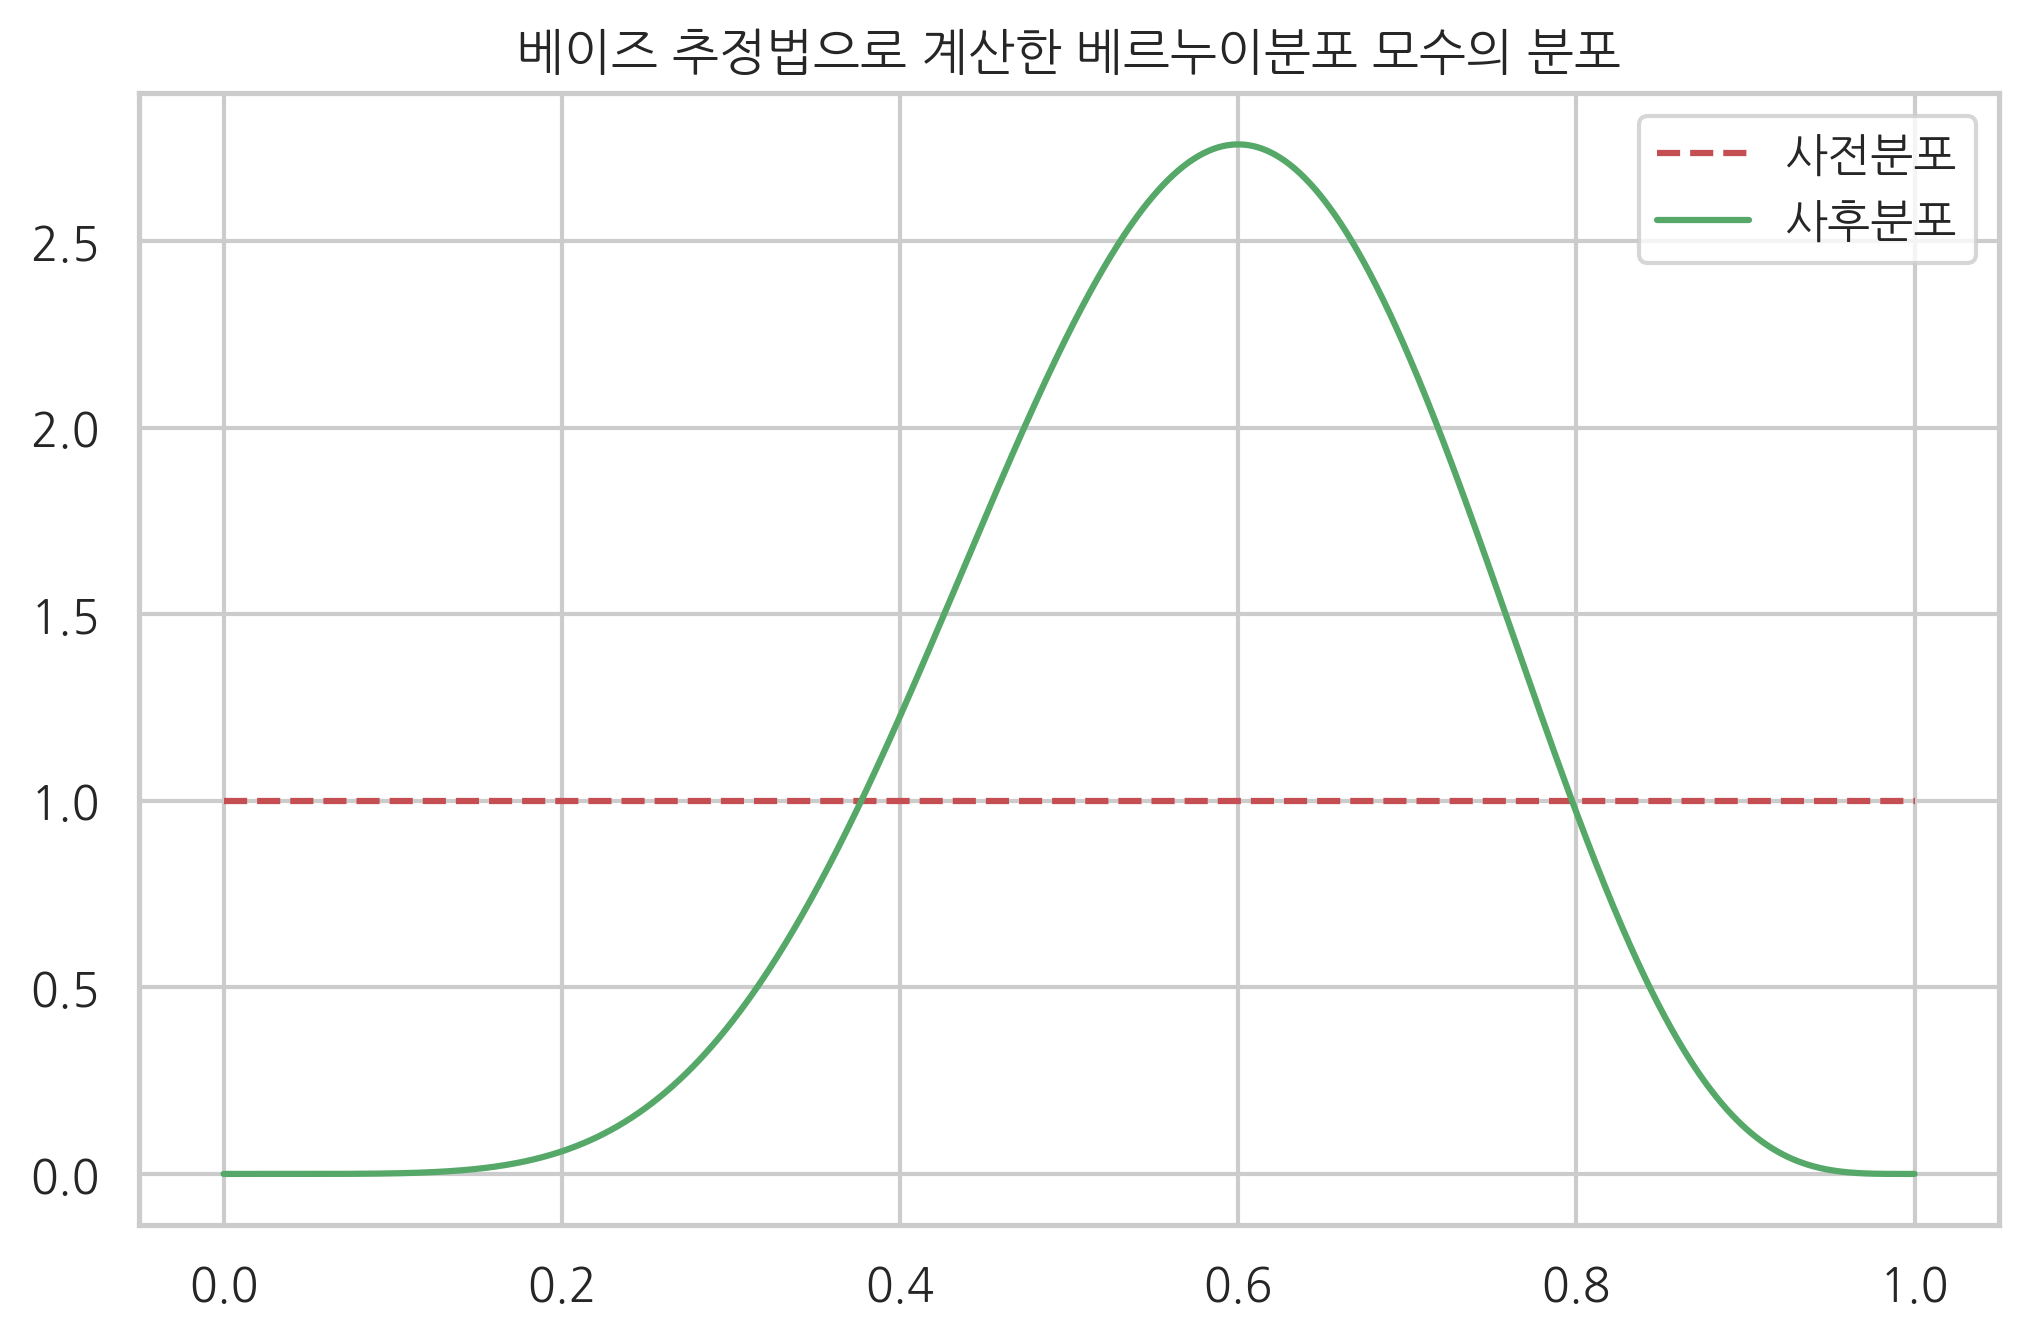

In [1]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="사전분포")
a1, b1 = 6 + 1, 4 + 1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="사후분포")
plt.legend()
plt.title("베이즈 추정법으로 계산한 베르누이분포 모수의 분포")
plt.show()

#### 연습 문제 9.3.1

위에서 예로 든 상품 A와 상품 B의 베르누이 모수의 사후분포의 하이퍼파라미터를 구하고 각각 사후분포 확률밀도함수를 그려라.

베이즈 추정법의 장점은 **순차적(sequential)** 계산이 가능하다는 점이다. 예를 들어 매 50개의 데이터를 수집하는 경우를 생각하자. 베이즈 추정법법을 사용하면 첫날 50개의 데이터로 모수를 추정한 뒤 다음날에는 추가적인 데이터 50개를 사용하여 모숫값을 더 정확하게 수정할 수 있다. 이 과정에서 계산량은 증가하지 않는다. 그다음 날도 마찬가지다. 

하지만 최대가능도 추정법을 사용하면 첫날에는 데이터 50개를 이용하여 모수를 추정하지만 둘째 날에는 100개의 데이터를 사용하여 모수를 추정해야다. 그다음 날에는 150개의 데이터를 사용하여 계산을 해야 한다. 데이터가 더 수집되면 점점 추정에 사용되는 데이터의 수가 증가하고 그에 따라 계산량도 증가한다.

다음 그림에서는 실제 모숫값이 0.65인 베르누이분포에 대해 베이즈 추정법을 한 결과를 보이고 있다. 처음에는 데이터 50개로 모수를 추정했으며 다음에는 데이터 50개를 추가했다. 이러한 방식으로 데이터 개수가 200개까지 증가할 때 추정 결과가 어떻게 달라지는지를 보인다.

초기 추정: 모드 = 모름
0차 추정: 모드 = 0.64
1차 추정: 모드 = 0.69
2차 추정: 모드 = 0.65


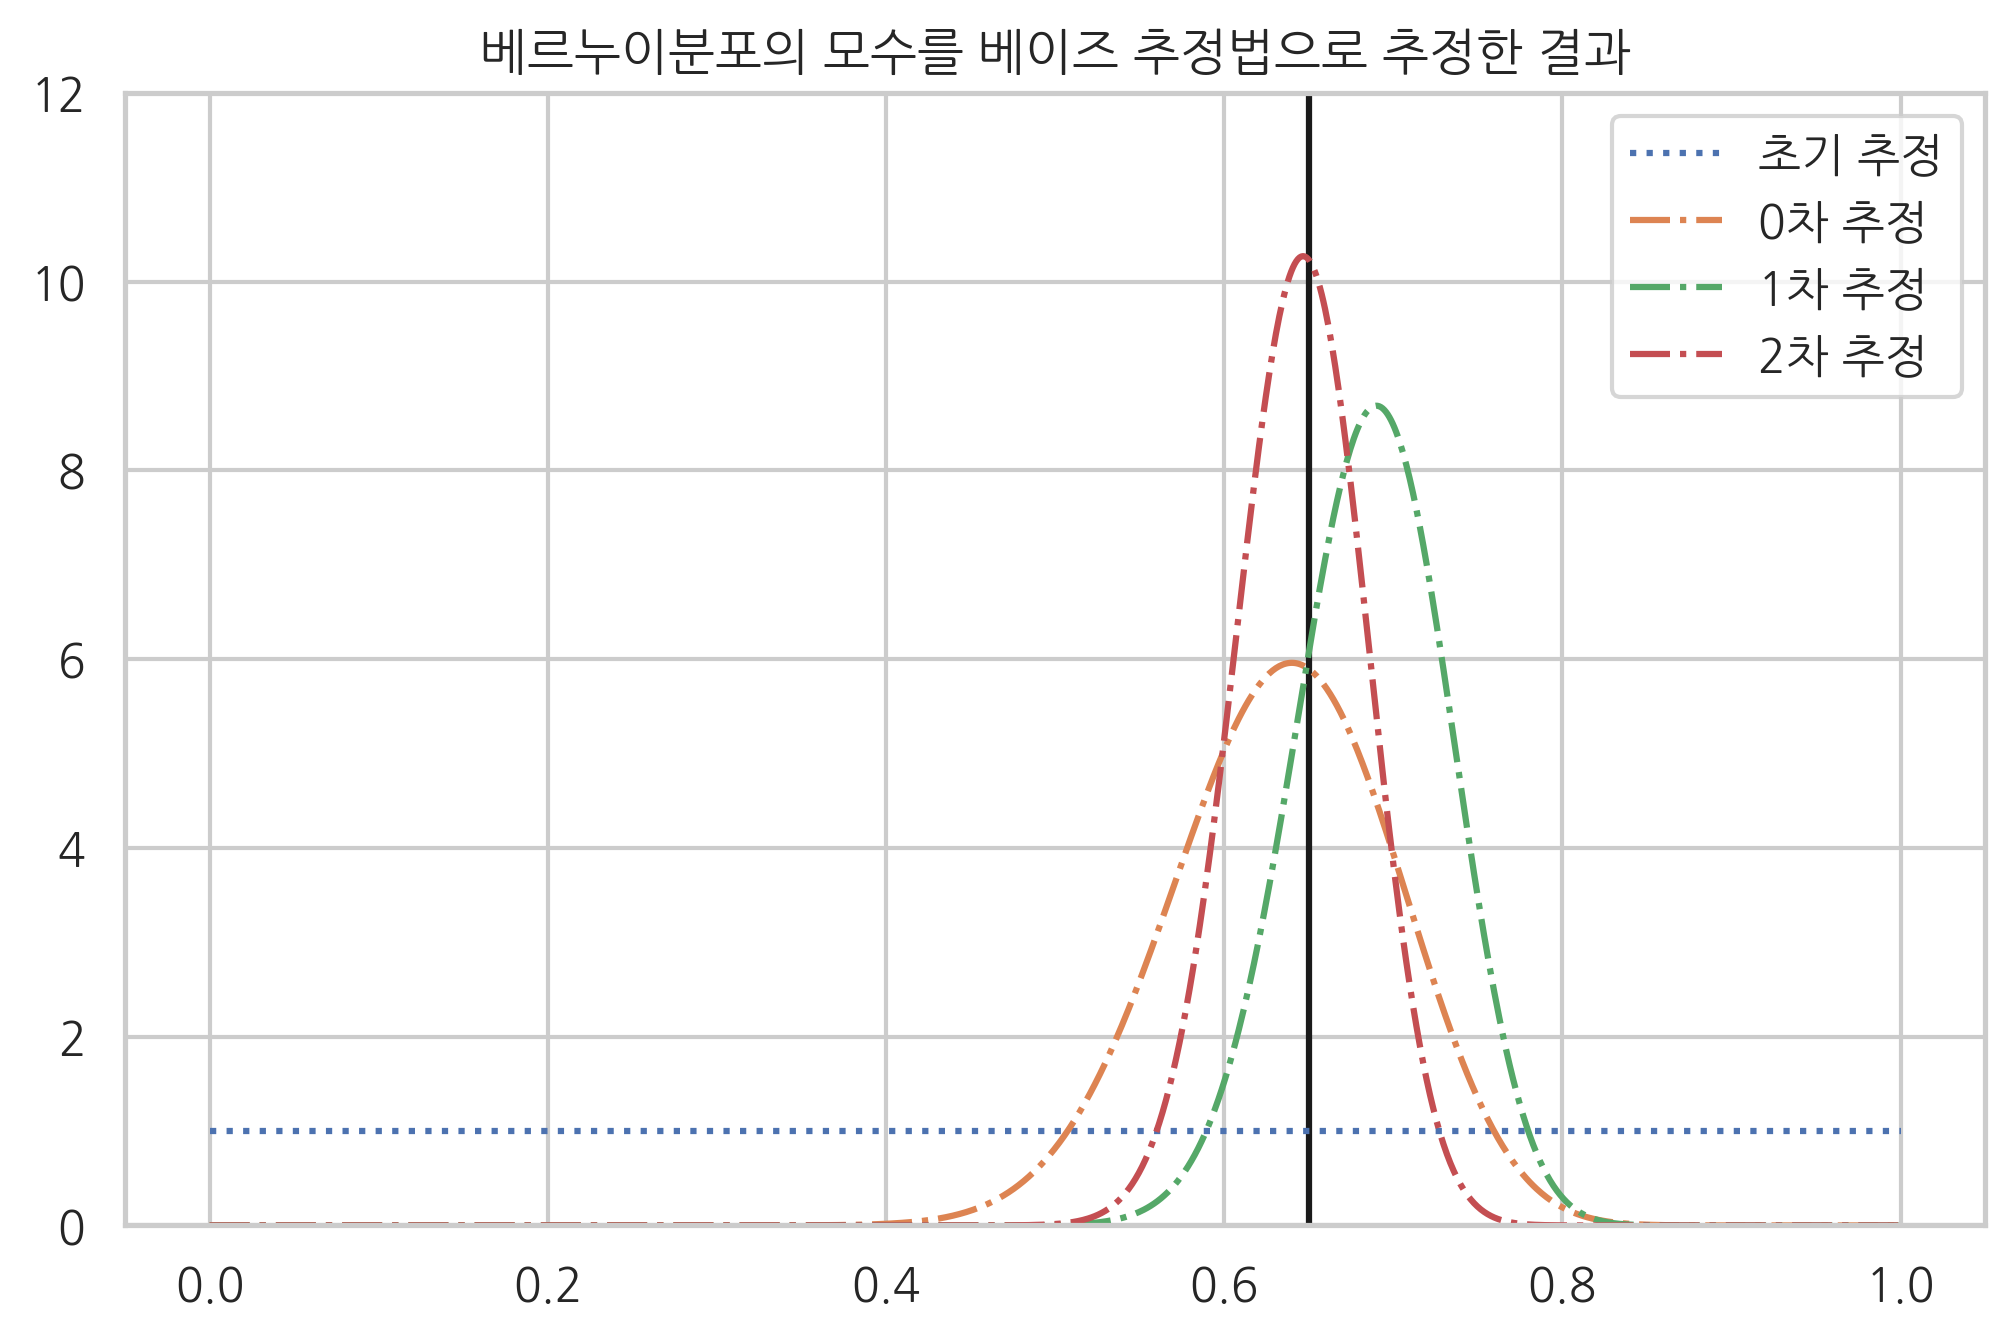

In [2]:
mu0 = 0.65
a, b = 1, 1
print("초기 추정: 모드 = 모름")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls=":", label="초기 추정")

np.random.seed(0)

for i in range(3):
    x = sp.stats.bernoulli(mu0).rvs(50)
    N0, N1 = np.bincount(x, minlength=2)
    a, b = a + N1, b + N0
    plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls="-.", label="{}차 추정".format(i))
    print("{}차 추정: 모드 = {:4.2f}".format(i, (a - 1)/(a + b - 2)))


plt.vlines(x=0.65, ymin=0, ymax=12)
plt.ylim(0, 12)
plt.legend()
plt.title("베르누이분포의 모수를 베이즈 추정법으로 추정한 결과")
plt.show()

### 카테고리분포의 모수 추정

다음으로 클래스 개수가 $K$인 카테고리분포의 모수 $\mu$ 벡터를 베이즈 추정법으로 추정해보자.

카테고리분포의 모수의 각 원소는 모두 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼모수 $\alpha_k=1$인 디리클리 분포라고 가정한다.

$$
\begin{align}
p(\mu) \propto \prod_{k=1}^K \mu_k^{\alpha_k - 1} \;\;\; (\alpha_k = 1, \; \text{ for all } k)
\tag{9.3.7}
\end{align}
$$

데이터는 모두 독립적인 카테고리 분포의 곱이므로 가능도 함수는 다음처럼 다항 분포다.

$$
\begin{align}
p(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N  \prod_{k=1}^K \mu_k^{x_{i,k}}
\tag{9.3.8}
\end{align}
$$

베이즈 정리로 사후 분포를 구하면 다음과 같이 갱신된 하이퍼모수 $\alpha'_i$를 가지는 디리클리 분포가 된다.

$$ 
\begin{align}
\begin{aligned}
p(\mu \mid x_{1},\ldots,x_{N})
&\propto p(x_{1},\ldots,x_{N} \mid \mu)  p(\mu) \\
&= \prod_{i=1}^N  \prod_{k=1}^K \mu_k^{x_{i,k}} \cdot \prod_{k=1}^K \mu_k^{\alpha_k - 1}  \\
&= \prod_{k=1}^K  \mu^{\sum_{i=1}^N x_{i,k} + \alpha_k - 1}   \\
&= \prod_{k=1}^K  \mu^{N_k + \alpha_k -1}   \\
&= \prod_{k=1}^K  \mu^{\alpha'_k -1}   \\
\end{aligned}
\tag{9.3.9}
\end{align}
$$

이 경우에도 마찬가지로 디리클리분포는 켤레 분포임을 알 수 있다.
갱신된 하이퍼 모숫값은 다음과 같다.

$$
\begin{align}
\alpha'_k = N_k + \alpha_k
\tag{9.3.10}
\end{align}
$$



#### 예제

어떤 식물원에 세 종류의 붓꽃이 있다. 이 세 붓꽃의 비율을 카테고리분포로 나타내고자 한다. 카테고리분포의 모수는 디리클리분포로 표현한다.

In [3]:
def plot_dirichlet(alpha, n):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])

    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
    plt.axis("equal")
    plt.title("정규분포 확률변수의 모수를 베이즈 추정법으로 추정한 결과: {} 추정".format(n))
    plt.show()

mu0 = np.array([0.3, 0.5, 0.2])

np.random.seed(0)

아무런 데이터도 없을 때는 카테고리분포의 모수는 모든 경우에 같다. 이 때 디리클리분포의 하이퍼모수는 

$$
\begin{align}
\alpha_1 = \alpha_1 = \alpha_1 = 1
\tag{9.3.11}
\end{align}
$$

이다.

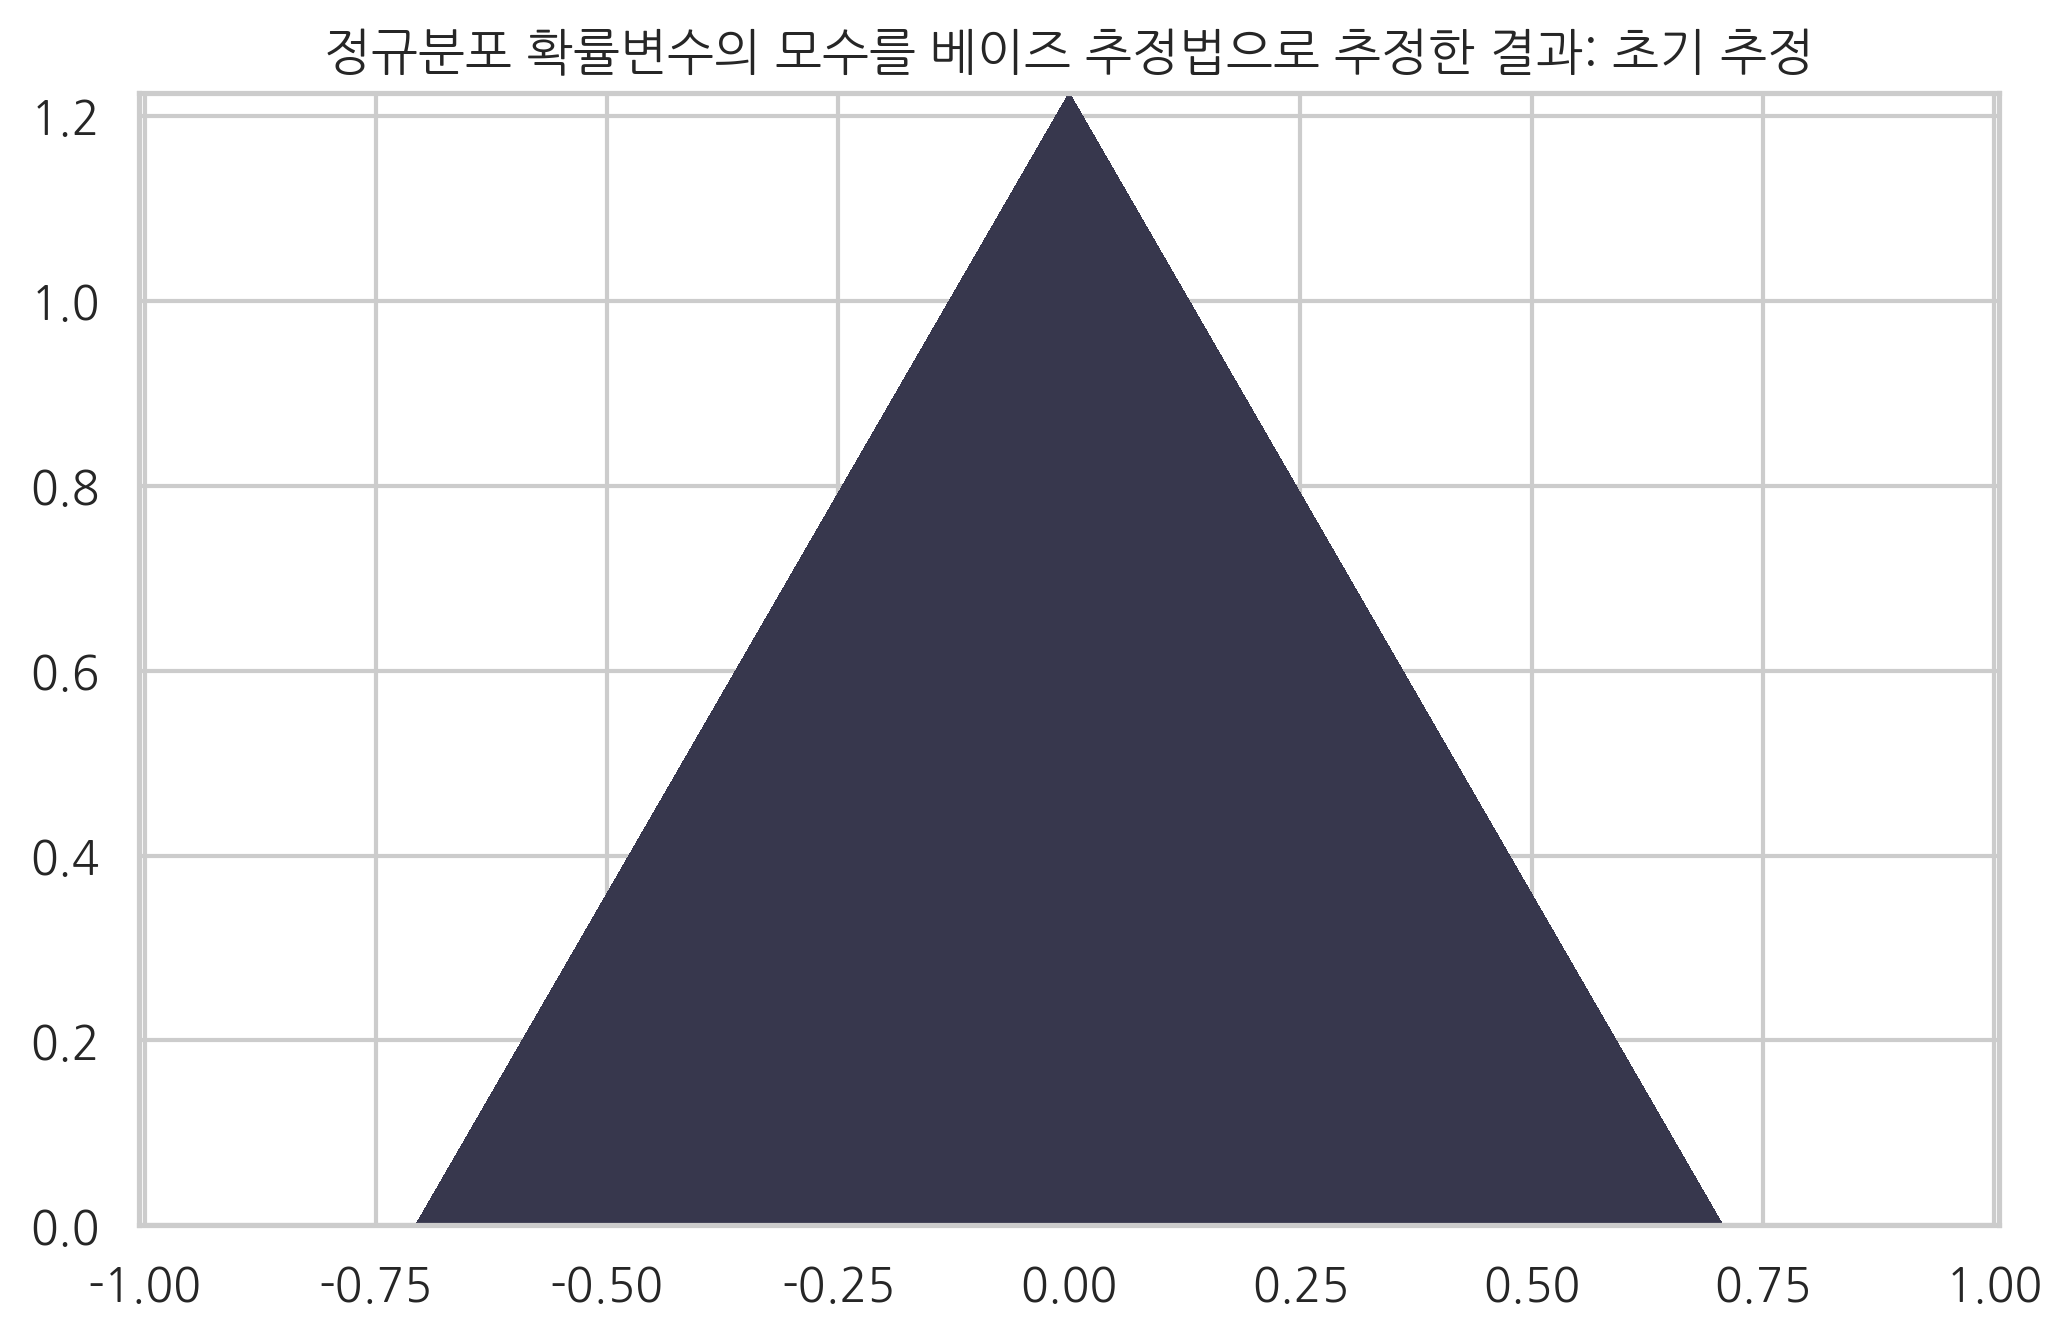

In [4]:
a0 = np.ones(3)
plot_dirichlet(a0, "초기")

만약 1차로 측정한 종류별 붓꽃의 수가 각각 9, 29, 12개였다면 디리클리분포의 하이퍼모수는 다음과 같다. 모수의 위치도 그림으로 표현하였다.

종류별 붓꽃의 수 =[10 32  8]
1차 추정 하이퍼모수: [0.2  0.64 0.16]


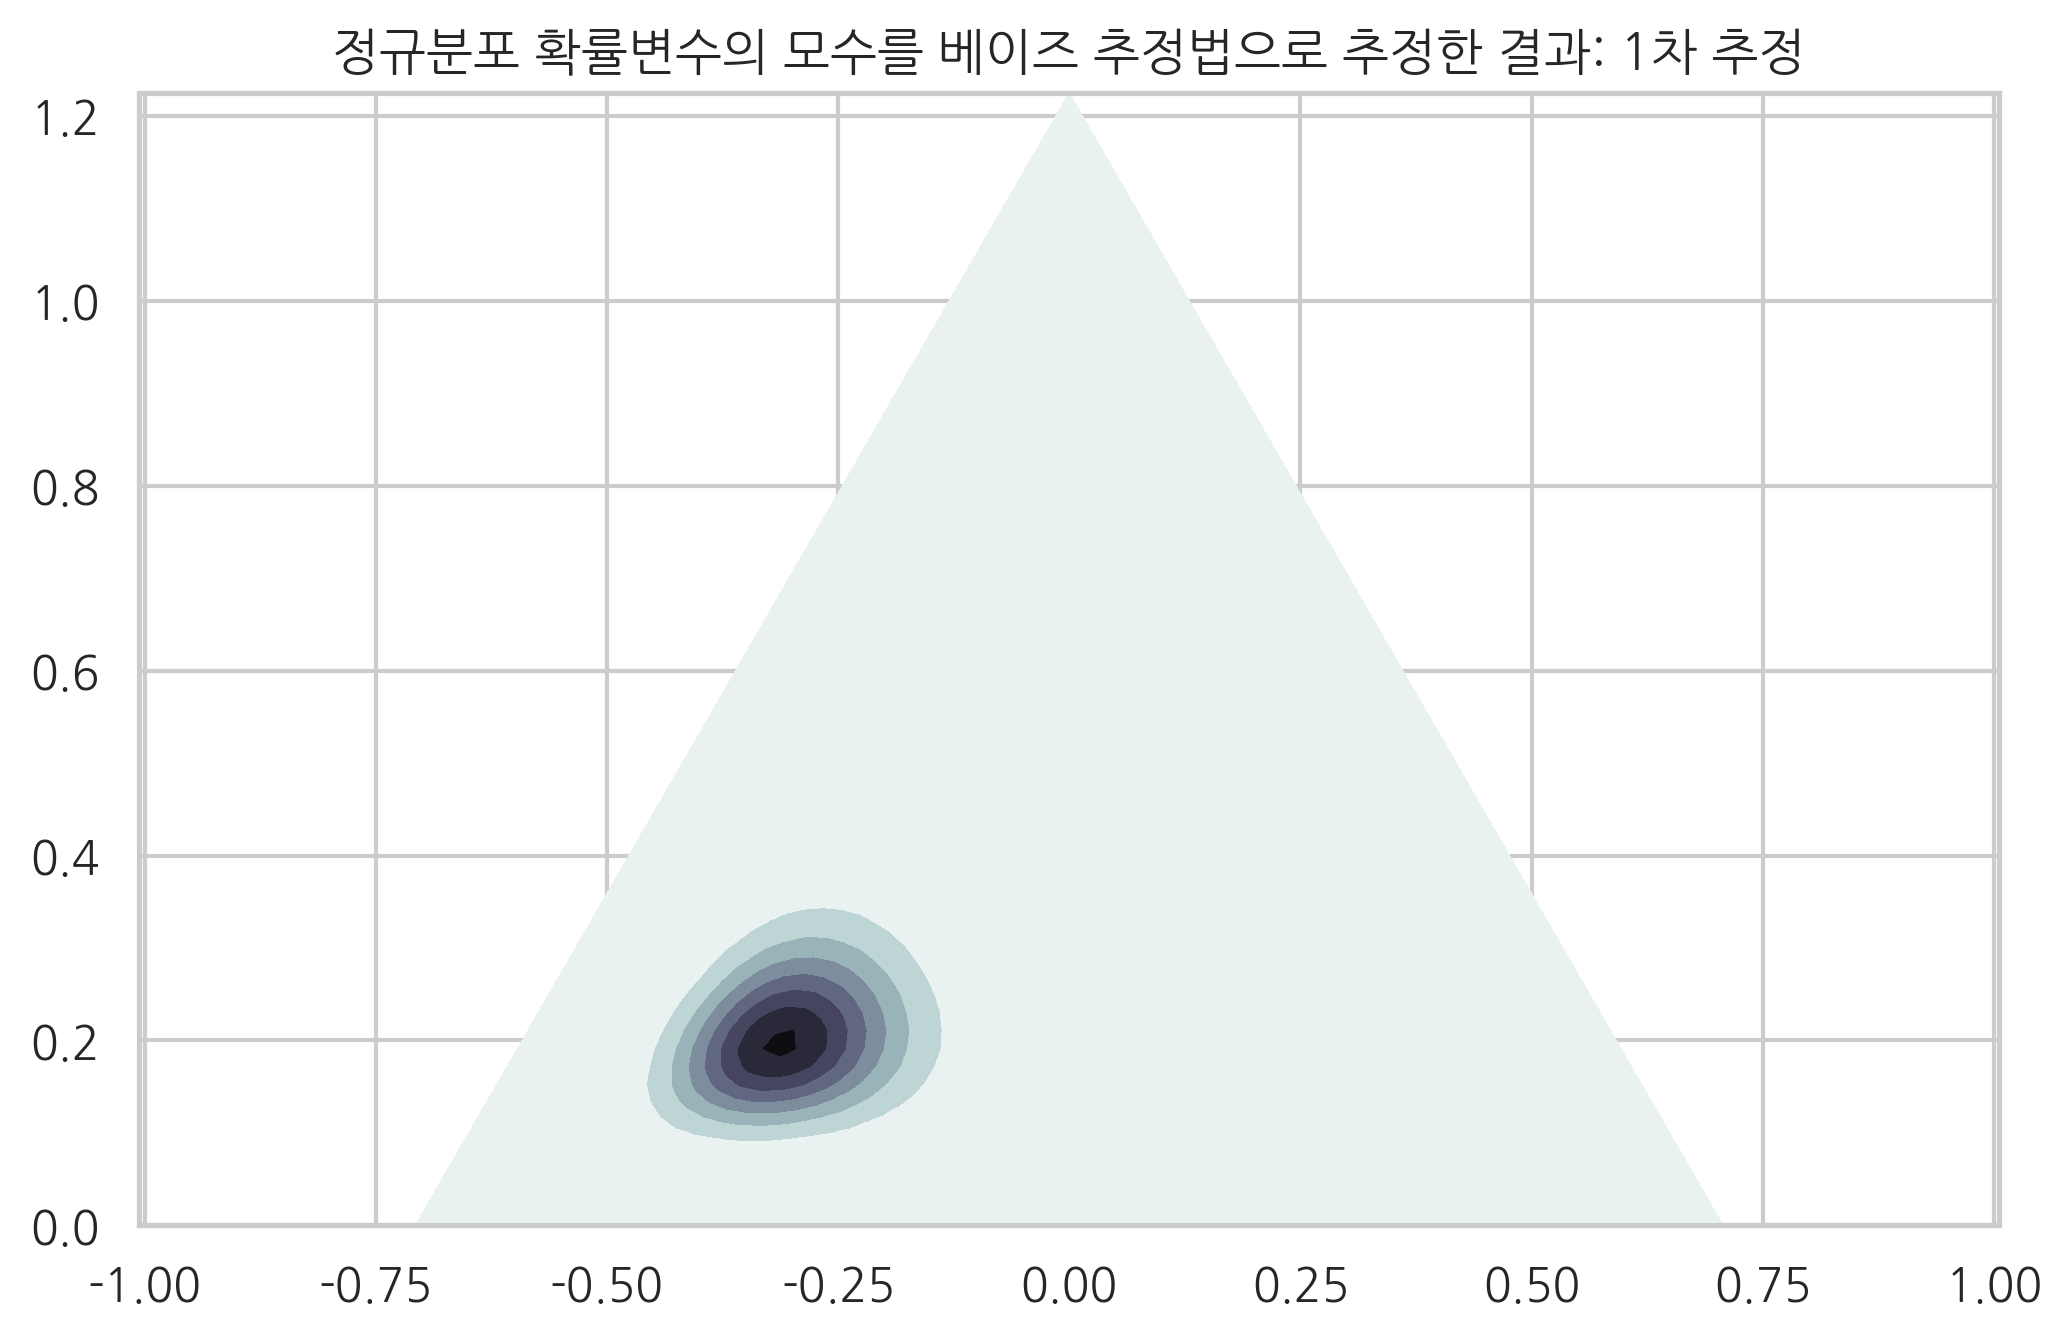

In [5]:
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
a1 = a0 + N1

print("종류별 붓꽃의 수 ={}".format(N1))
print("1차 추정 하이퍼모수:", (a1 - 1)/(a1.sum() - 3))

plot_dirichlet(a1, "1차")

2차로 추가측정한 종류별 붓꽃의 수가 각각 21, 26, 3개였다면 디리클리분포의 하이퍼모수는 다음과 같다. 모수의 위치도 그림으로 표현하였다.

종류별 붓꽃의 수 =[24 19  7]
2차 추정 하이퍼모수: [0.34 0.51 0.15]


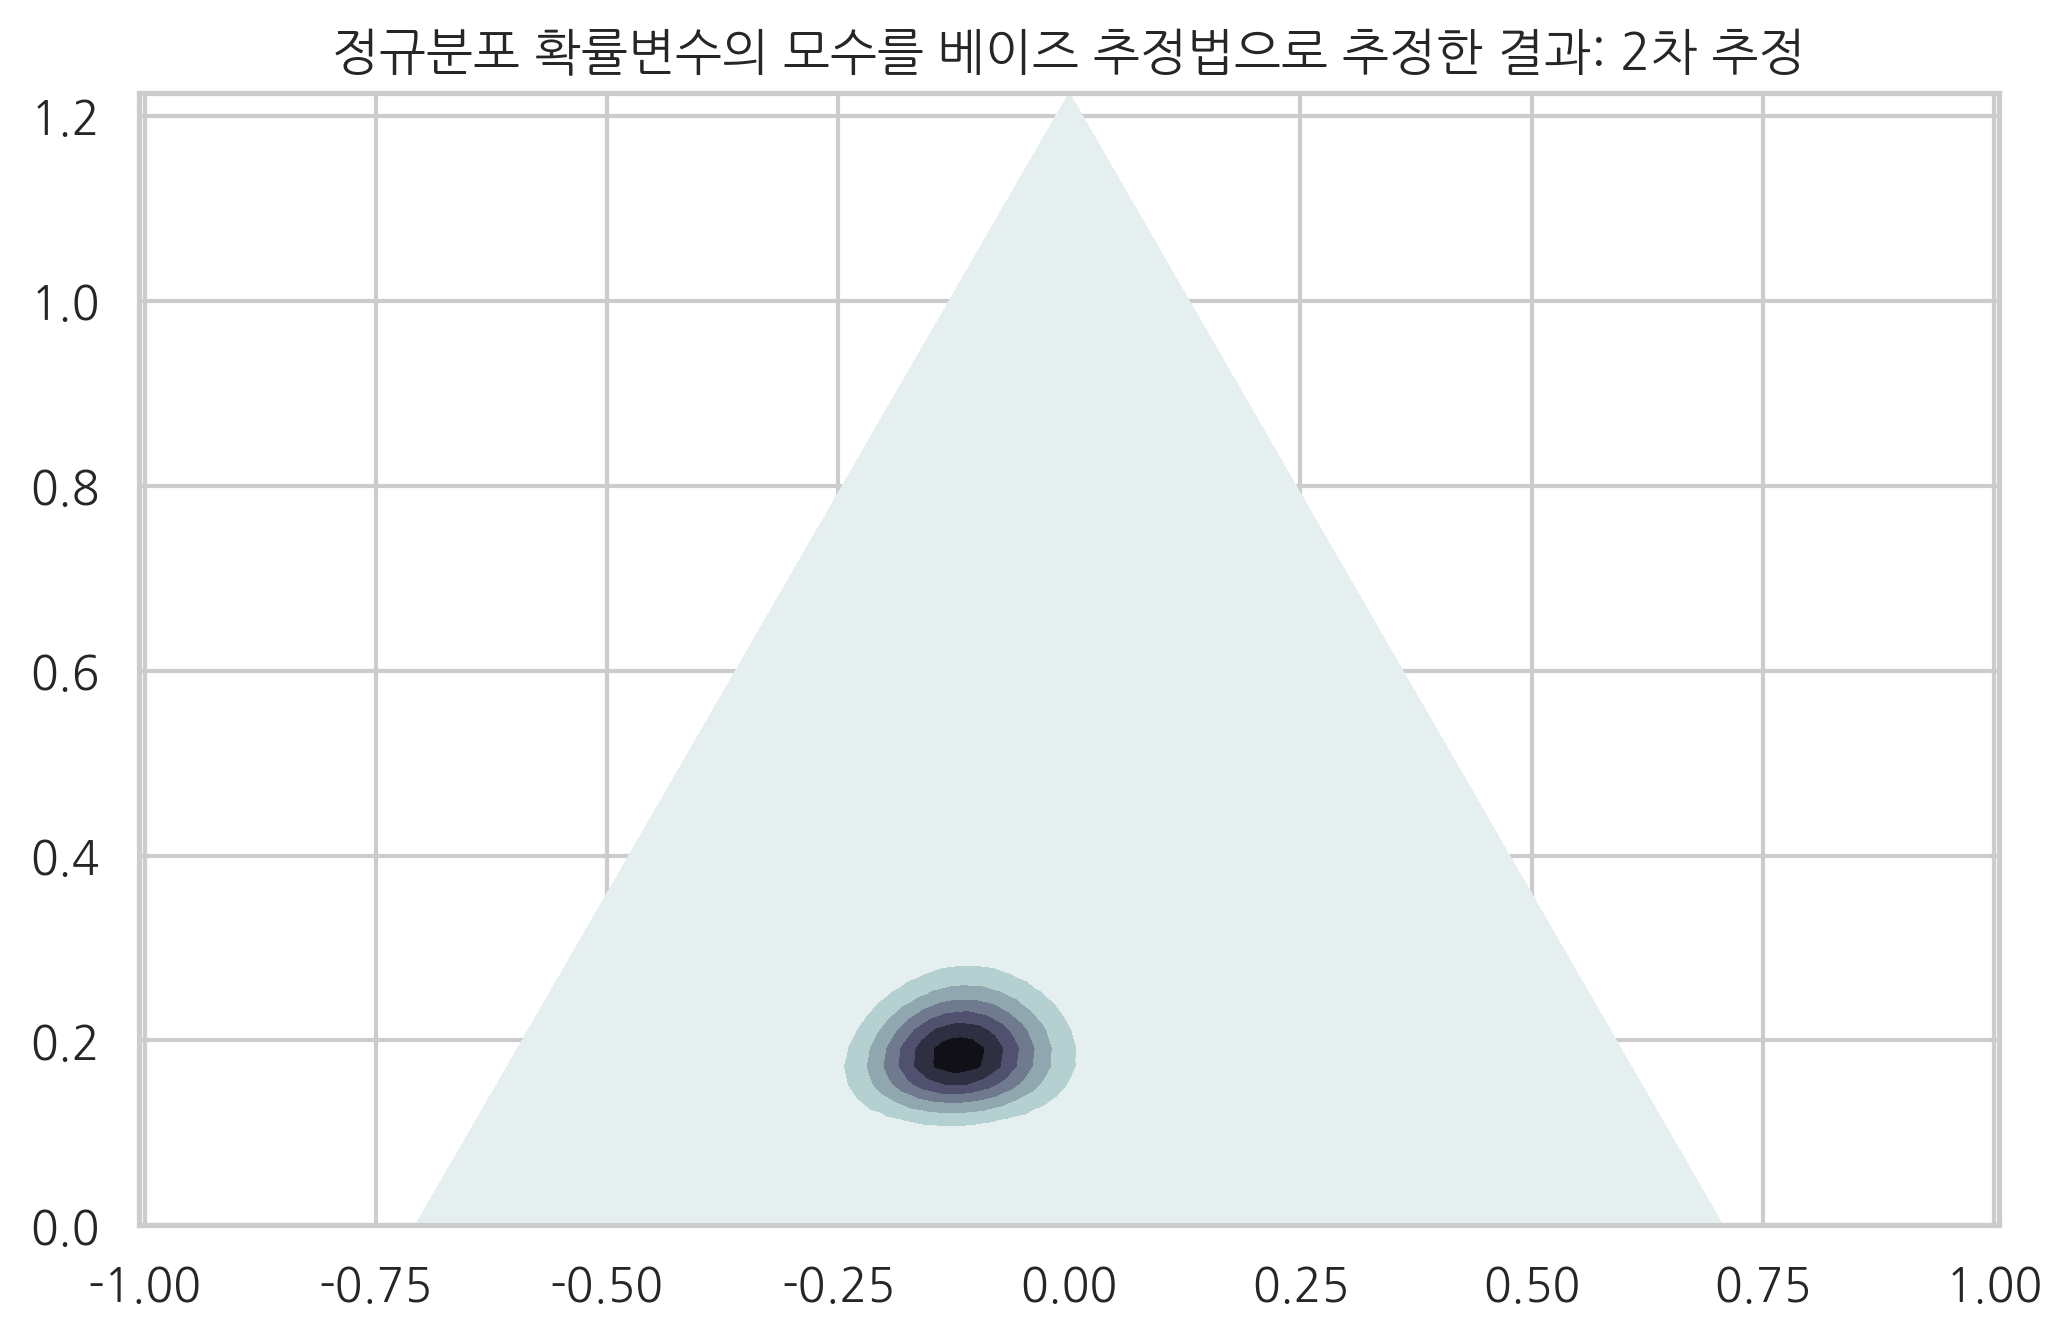

In [6]:
x2 = np.random.choice(3, 50, p=mu0)
N2 = np.bincount(x2, minlength=3)
a2 = a1 + N2

print("종류별 붓꽃의 수 ={}".format(N2))
print("2차 추정 하이퍼모수:", (a2 - 1)/(a2.sum() - 3))

plot_dirichlet(a2, "2차")

### 정규분포의 기댓값 모수 추정

이번에는 정규분포의 기댓값 모수를 베이지안 방법으로 추정한다. 분산 모수 $\sigma^2$은 알고 있다고 가정한다.

기댓값은 $-\infty$부터 $\infty$까지의 모든 수가 가능하기 때문에 모수의 사전 분포로는 정규분포를 사용한다.

$$
\begin{align}
p(\mu) = N(\mu_0, \sigma^2_0) = \dfrac{1}{\sqrt{2\pi\sigma_0^2}} \exp \left(-\dfrac{(\mu-\mu_0)^2}{2\sigma_0^2}\right)
\tag{9.3.12}
\end{align}
$$

데이터는 모두 독립적인 정규분포의 곱이므로 가능도 함수는 다음과 같다.

$$
\begin{align}
p(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N N(x_i \mid \mu )  = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)
\tag{9.3.13}
\end{align}
$$

$$ 
\begin{align}
\begin{aligned}
p(\mu \mid x_{1},\ldots,x_{N})  
&\propto p(x_{1},\ldots,x_{N} \mid \mu) p(\mu) \\
&\propto \exp \left(-\dfrac{(\mu-\mu'_0)^2}{2\sigma_0^{'2}}\right) \\
\end{aligned}
\tag{9.3.14}
\end{align}
$$

베이즈 정리를 이용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼모수를 가지는 정규분포가 된다.

$$
\begin{align}
\begin{aligned}
\mu'_0 &= \dfrac{\sigma^2}{N\sigma_0^2 + \sigma^2}\mu_0 + \dfrac{N\sigma_0^2}{N\sigma_0^2 + \sigma^2} \dfrac{\sum x_i}{N} \\
\dfrac{1}{\sigma_0^{'2}} &= \dfrac{1}{\sigma_0^{2}} + \dfrac{N}{\sigma^{2}}
\end{aligned}
\tag{9.3.15}
\end{align}
$$


#### 예제

다음은 실제 기댓값이 2, 분산이 4인 정규분포에서 나온 데이터를 이용하여 기댓값 모수를 순차적 베이즈 추정한 결과다. 각 차수별로 100개의 데이터를 사용하였다. 초기 추정값 즉, 사전확률분포로는 기댓값이 0, 분산이 1인 정규분포를 사용하였다.

0차 추정: 1.98
1차 추정: 2.07
2차 추정: 2.05
3차 추정: 2.03


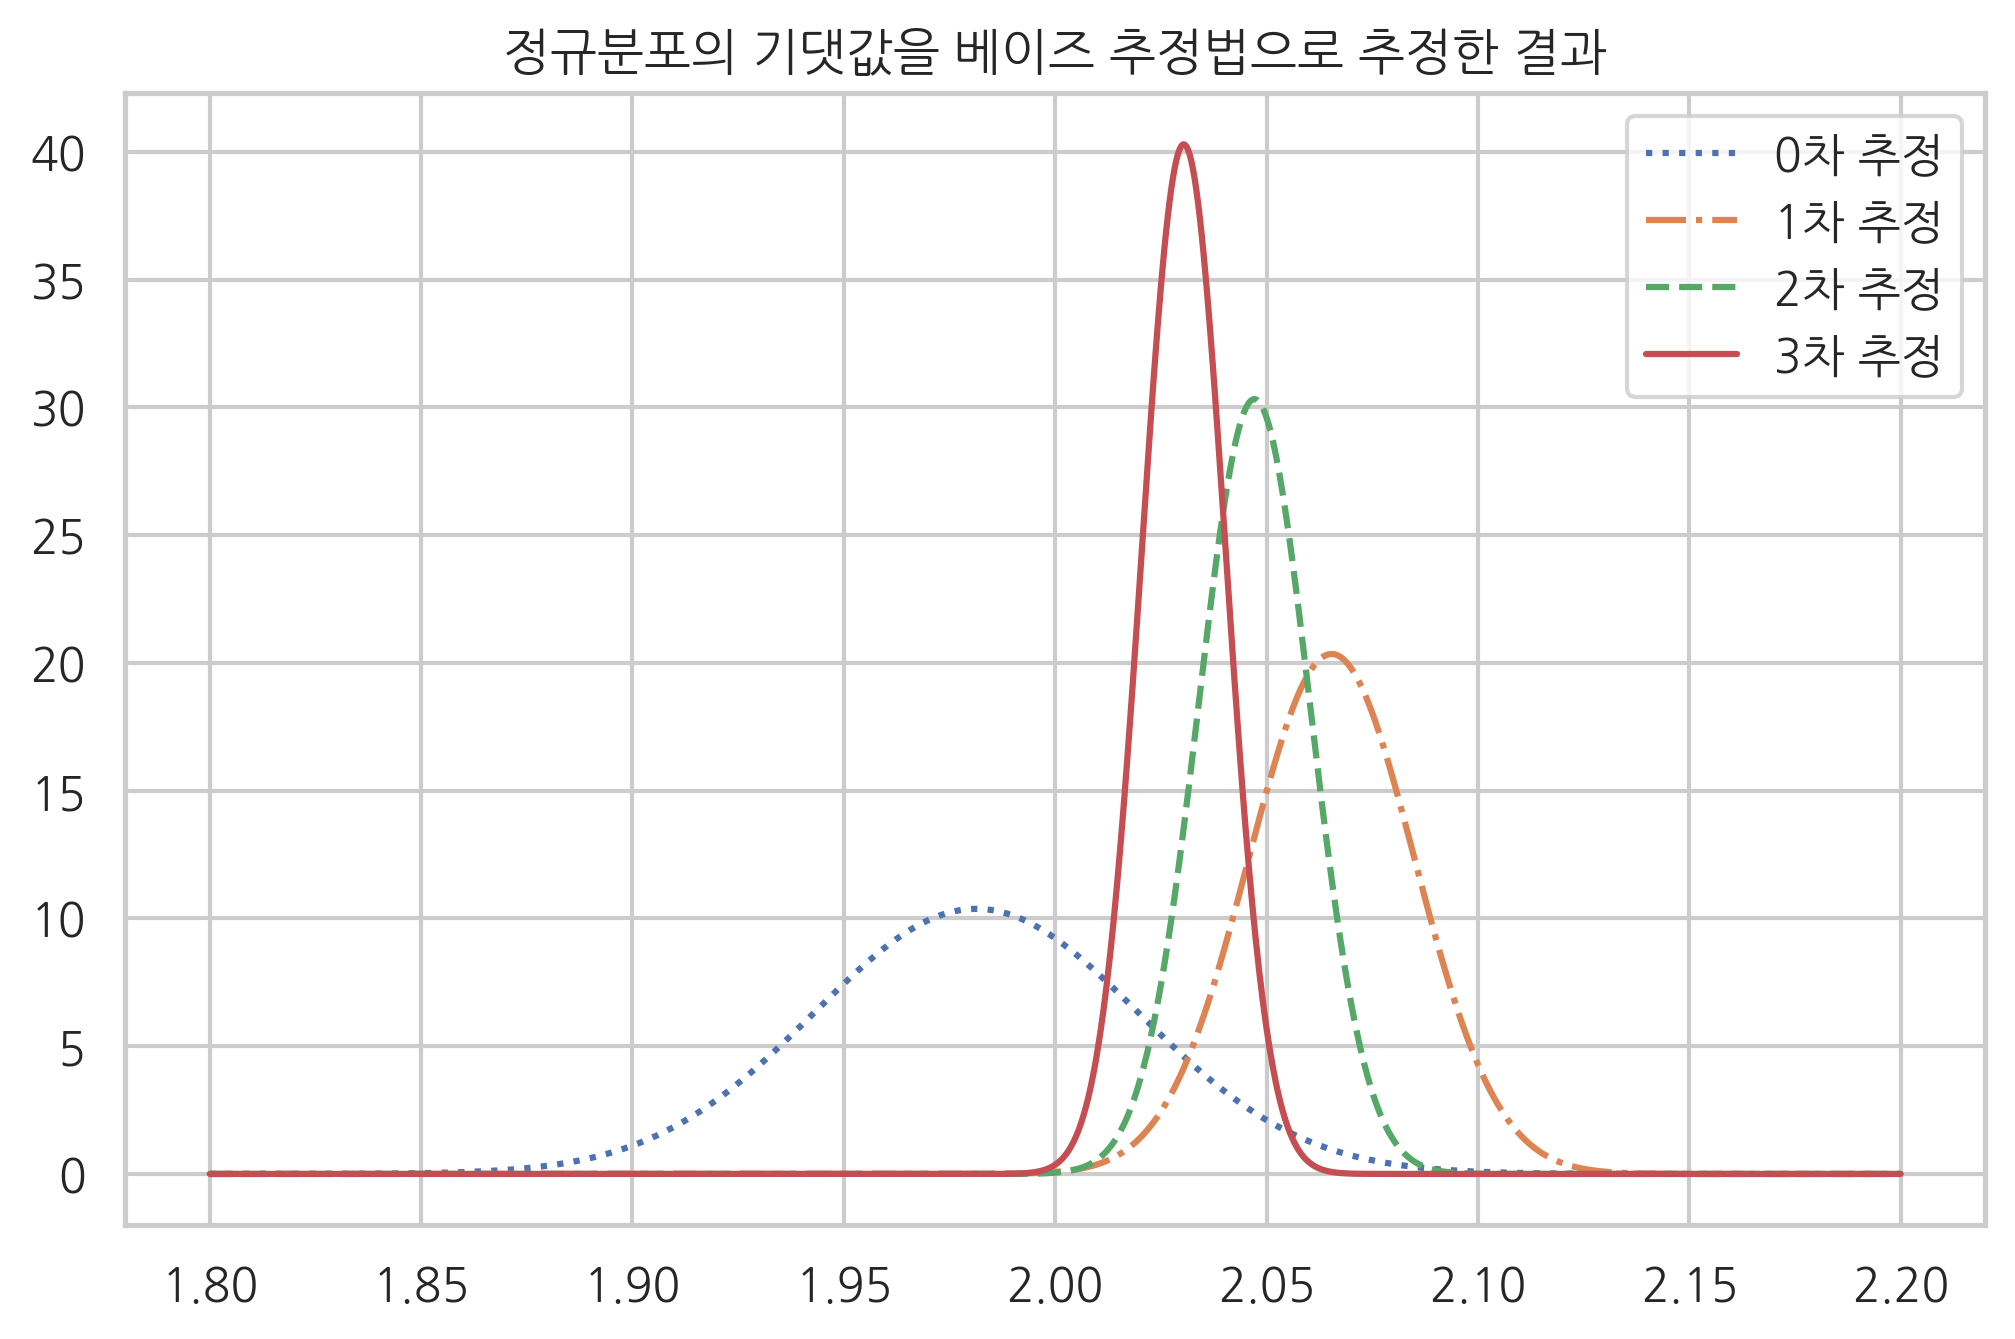

In [7]:
mu, sigma2 = 2, 4
mu0, sigma20 = 0, 1
xx = np.linspace(1.8, 2.2, 1000)
np.random.seed(1)
N = 100
ls = [":", "-.", "--", "-"]
for i in range(4):
    x = sp.stats.norm(mu).rvs(N)
    mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
        (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
    sigma20 = 1/(1/sigma20 + N/sigma2)
    plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), ls=ls[i], label="{}차 추정".format(i))
    print("{}차 추정: {:4.2f}".format(i, mu0))
plt.legend()
plt.title("정규분포의 기댓값을 베이즈 추정법으로 추정한 결과")
plt.show()

#### 연습 문제 9.3.2

사이킷런에서 제공하는 붓꽃데이터 중 꽃받침의 길이를 정규분포라고 가정하고 베이즈 추정법을 사용하여 기댓값을 추정하라. 단, 정규분포의 분산으로는 표본분산을 사용하고 사전분포로 기댓값 1, 분산 1인 정규분포를 사용한다.